In [1]:
from prep_data import Data_prepare
import numpy as np 
import os 
import mne
import io
from matplotlib import pyplot as plt
# import prep_data

In [23]:
biosemi_montage = mne.channels.make_standard_montage('biosemi128')
a = biosemi_montage.get_positions()['ch_pos']

In [24]:
arr = []
for i in a.keys():
    arr.append(np.array(a[i][:2]))
arr = np.array(arr)

In [27]:
type(arr[0][0])

numpy.float64

In [8]:
dp = Data_prepare() 

m_file = "./raw_data/Emotrans1_Boy_data_preprocessed_42.mat" 
f_file = "./raw_data/Emotrans1_girl_data_preprocessed_42.mat"
# index = [11,18,36]
df = dp.combine_male_female(m_file,f_file)

In [16]:
temp = df[0][0][0][0]
print(temp.shape)
temp = np.delete(temp,0,2)
temp.shape

(128, 8, 2)


(128, 8, 1)

In [17]:
temp = temp.reshape(8,128,1)
temp.shape

(8, 128, 1)

In [28]:
channel = temp[0].reshape(128,)
channel.shape

(128,)

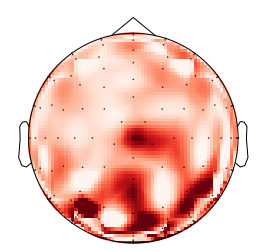

(<matplotlib.image.AxesImage at 0x7fb550753bd0>, None)

In [31]:
mne.viz.plot_topomap(channel, arr, show=False, contours=0, image_interp="nearest")

In [24]:
def get_electrode_positions():
    """
    Returns a dictionary (Name) -> (x,y,z) of electrode name in the extended
    10-20 system and its carthesian coordinates in unit sphere.
    """
    positions = dict()
    with io.open("electrode_positions.txt", "r") as pos_file:
        for line in pos_file:
            parts = line.split()
            positions[parts[0]] = tuple([float(part) for part in parts[1:]])
    return positions
a = get_electrode_positions()
PHYSIONET_ELECTRODES = { 
    1 : "FC5", 2 : "FC3", 3 : "FC1", 4 : "FCz", 5 : "FC2", 6 : "FC4", 
    7 : "FC6", 8 : "C5", 9 : "C3", 10: "C1", 11: "Cz", 12: "C2", 
    13: "C4", 14: "C6", 15: "CP5", 16: "CP3", 17: "CP1", 18: "CPz", 
    19: "CP2", 20: "CP4", 21: "CP6", 22: "Fp1", 23: "Fpz", 24: "Fp2",
    25: "AF7", 26: "AF3", 27: "AFz", 28: "AF4", 29: "AF8", 30: "F7", 
    31: "F5", 32: "F3", 33: "F1", 34: "Fz", 35: "F2", 36: "F4", 
    37: "F6", 38: "F8", 39: "FT7", 40: "FT8", 41: "T7", 42: "T8", 
    43: "T9", 44: "T10", 45: "TP7", 46: "TP8", 47: "P7", 48: "P5", 
    49: "P3", 50: "P1", 51: "Pz", 52: "P2", 53: "P4", 54: "P6", 
    55: "P8", 56: "PO7", 57: "PO3", 58: "POz", 59: "PO4", 60: "PO8",
    61: "O1", 62: "Oz", 63: "O2", 64: "Iz"
}

In [34]:
arr = []
for i in a.keys():
    arr.append(np.array(a[i][:2]))
arr = np.array(arr)

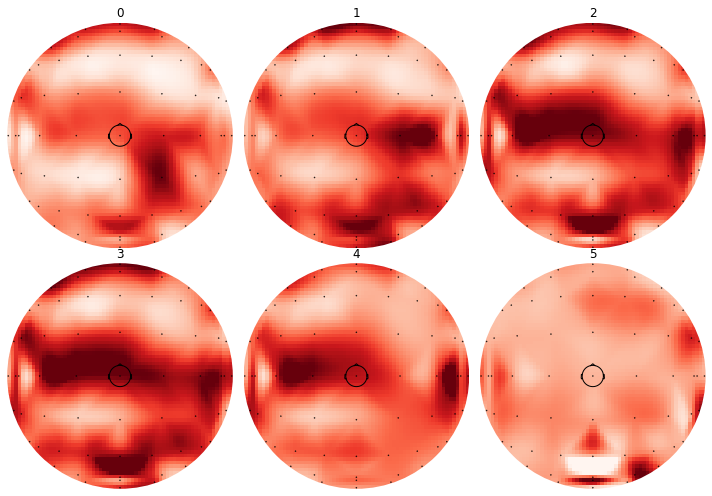

In [36]:
temp = df[0][0][0][0]
temp = np.delete(temp,0,axis=2)
temp = temp.reshape((128,8))
temp.shape
selection=[0,1,2,3,4,5]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,7))
for i,idx in enumerate(selection):
    ax = axes[i//3,i%3]
    ax.set_title(idx)
    mne.viz.plot_topomap(temp[:64,idx], arr, show=False, axes=ax, contours=0, image_interp="nearest")

fig.tight_layout()

In [2]:
sfreq = 1000  # Sampling frequency
times = np.arange(0, 10, 0.001)  # Use 10000 samples (10s)

sin = np.sin(times * 10)  # Multiplied by 10 for shorter cycles
cos = np.cos(times * 10)
sinX2 = sin * 2
cosX2 = cos * 2

# Numpy array of size 4 X 10000.
data = np.array([sin, cos, sinX2, cosX2])

# Definition of channel types and names.
ch_types = ['mag', 'mag', 'grad', 'grad']
ch_names = ['sin', 'cos', 'sinX2', 'cosX2']

In [3]:
data.shape

(4, 10000)

In [4]:
# It is also possible to use info from another raw object.
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

Creating RawArray with float64 data, n_channels=4, n_times=10000
    Range : 0 ... 9999 =      0.000 ...     9.999 secs
Ready.


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


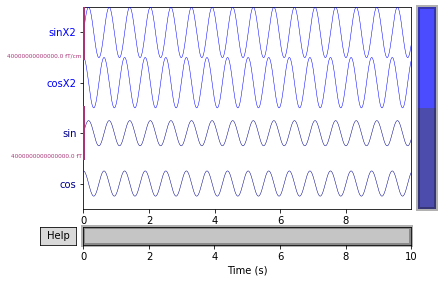

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


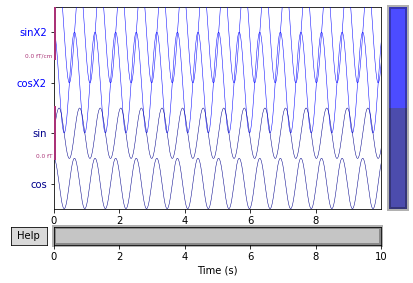

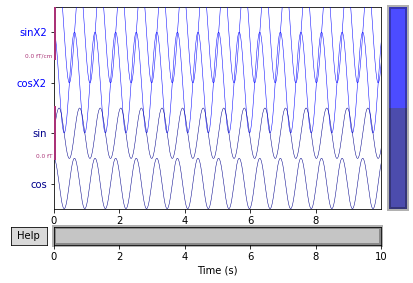

In [5]:
raw = mne.io.RawArray(data, info)

# Scaling of the figure.
# For actual EEG/MEG data different scaling factors should be used.
scalings = {'mag': 2, 'grad': 2}

raw.plot(n_channels=4, scalings=scalings, title='Data from arrays',
         show=True, block=True)

# It is also possible to auto-compute scalings
scalings = 'auto'  # Could also pass a dictionary with some value == 'auto'
raw.plot(n_channels=4, scalings=scalings, title='Auto-scaled Data from arrays',
         show=True, block=True)